In [235]:
import pandas as pd
import numpy as np

data = pd.read_csv('openfoodfacts.csv', sep='delimiter', header=None, engine='python')
data

,0
0,code\turl\tcreator\tcreated_t\tcreated_datetim...
1,0000000003087\thttp://world-fr.openfoodfacts.o...
2,0000000004530\thttp://world-fr.openfoodfacts.o...
3,0000000004559\thttp://world-fr.openfoodfacts.o...
4,0000000016087\thttp://world-fr.openfoodfacts.o...
...,...
320768,9948282780603\thttp://world-fr.openfoodfacts.o...
320769,99567453\thttp://world-fr.openfoodfacts.org/pr...
320770,9970229501521\thttp://world-fr.openfoodfacts.o...
320771,9980282863788\thttp://world-fr.openfoodfacts.o...


In [236]:
data = pd.read_csv('openfoodfacts.csv', sep='\t', low_memory=False)
pd.set_option('display.max_columns', None) #permet d'afficher toutes les colonnes
data

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ]

In [237]:
#on ne garde que les paramètres utiles pour notre étude
selected_columns = ['product_name', 'nutrition_grade_fr',\
                    'energy_100g', 'proteins_100g',\
                    'sugars_100g', 'fat_100g', 'saturated-fat_100g',\
                    'salt_100g', 'sodium_100g', 'fiber_100g',\
                    'fruits-vegetables-nuts_100g']
new_df = data[selected_columns].copy()
new_df

,product_name,nutrition_grade_fr,energy_100g,proteins_100g,sugars_100g,fat_100g,saturated-fat_100g,salt_100g,sodium_100g,fiber_100g,fruits-vegetables-nuts_100g
0,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Banana Chips Sweetened (Whole),d,2243.0,3.57,14.29,28.57,28.57,0.00000,0.000,3.6,NaN
2,Peanuts,b,1941.0,17.86,17.86,17.86,0.00,0.63500,0.250,7.1,NaN
3,Organic Salted Nut Mix,d,2540.0,17.86,3.57,57.14,5.36,1.22428,0.482,7.1,NaN
4,Organic Polenta,NaN,1552.0,8.57,NaN,1.43,NaN,NaN,NaN,5.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...
320767,Tomato & ricotta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",b,0.0,0.00,0.00,0.00,0.00,0.00000,0.000,0.0,NaN
320769,乐吧泡菜味薯片,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,Tomates aux Vermicelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [238]:
#on change le nom des colonnes mals renseignées
new_df.rename(columns={"saturated-fat_100g" : "saturated_fat_100g"\
                       , "fruits-vegetables-nuts_100g" : "fruits_vegetables_nuts_100g"},\
              inplace=True)
new_df

,product_name,nutrition_grade_fr,energy_100g,proteins_100g,sugars_100g,fat_100g,saturated_fat_100g,salt_100g,sodium_100g,fiber_100g,fruits_vegetables_nuts_100g
0,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Banana Chips Sweetened (Whole),d,2243.0,3.57,14.29,28.57,28.57,0.00000,0.000,3.6,NaN
2,Peanuts,b,1941.0,17.86,17.86,17.86,0.00,0.63500,0.250,7.1,NaN
3,Organic Salted Nut Mix,d,2540.0,17.86,3.57,57.14,5.36,1.22428,0.482,7.1,NaN
4,Organic Polenta,NaN,1552.0,8.57,NaN,1.43,NaN,NaN,NaN,5.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...
320767,Tomato & ricotta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",b,0.0,0.00,0.00,0.00,0.00,0.00000,0.000,0.0,NaN
320769,乐吧泡菜味薯片,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,Tomates aux Vermicelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [239]:
#on supprime les valeurs des produits dont le nom n'est pas renseigné
index_null_value = new_df[new_df['product_name'].isnull()].index
new_df.drop(index_null_value , inplace=True)

#on affiche les valeurs manquantes en pourcentage
Nan_values = new_df.isnull().sum()
total_values = len(data)
Nan_values_percentage = (Nan_values / total_values) * 100
Nan_values_percentage = round(Nan_values_percentage, 2)
print(Nan_values_percentage)

product_name                    0.00
nutrition_grade_fr             26.36
energy_100g                    14.10
proteins_100g                  14.46
sugars_100g                    19.05
fat_100g                       19.46
saturated_fat_100g             23.81
salt_100g                      15.74
sodium_100g                    15.75
fiber_100g                     32.55
fruits_vegetables_nuts_100g    93.52
dtype: float64


In [240]:
#pip install missingno

<Axes: >

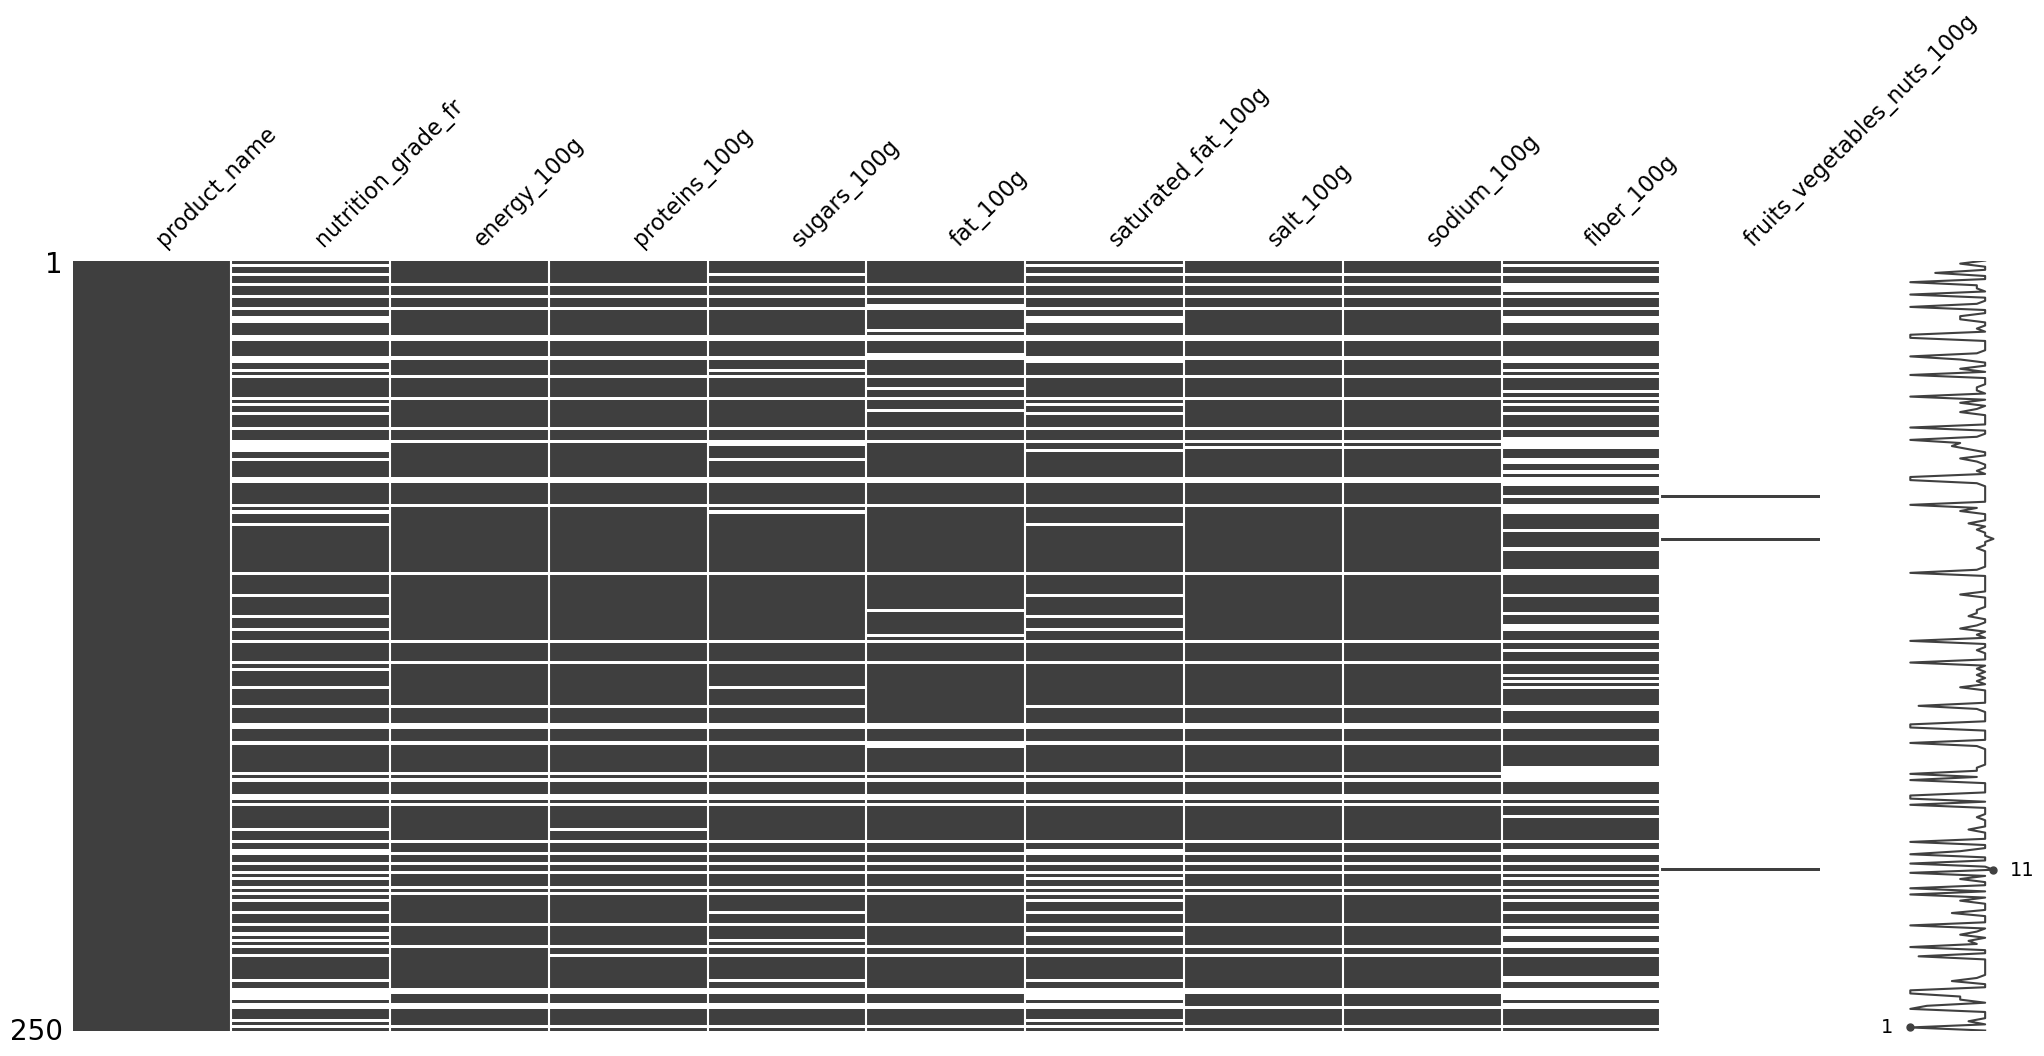

In [241]:
import missingno as msno
%matplotlib inline
msno.matrix(new_df.sample(250))

In [242]:
#on supprime les individus lorsque aucune donnée n'est renseigné dans les paramètres
#on affiche le pourcentage de suppression
df_index_drop = []
for i in new_df.itertuples():
    if pd.isna(i.energy_100g)\
    & pd.isna(i.proteins_100g)\
    & pd.isna(i.sugars_100g)\
    & pd.isna(i.fat_100g)\
    & pd.isna(i.salt_100g)\
    & pd.isna(i.sodium_100g)\
    & pd.isna(i.fiber_100g)\
    & pd.isna(i.saturated_fat_100g)\
    & pd.isna(i.fruits_vegetables_nuts_100g)\
    & pd.isna(i.nutrition_grade_fr):
        df_index_drop.append(i.Index)
        
len_list = len(df_index_drop)
print(round(len_list/len(new_df)*100, 2))
df = new_df.drop(df_index_drop).copy()

14.36


<Axes: >

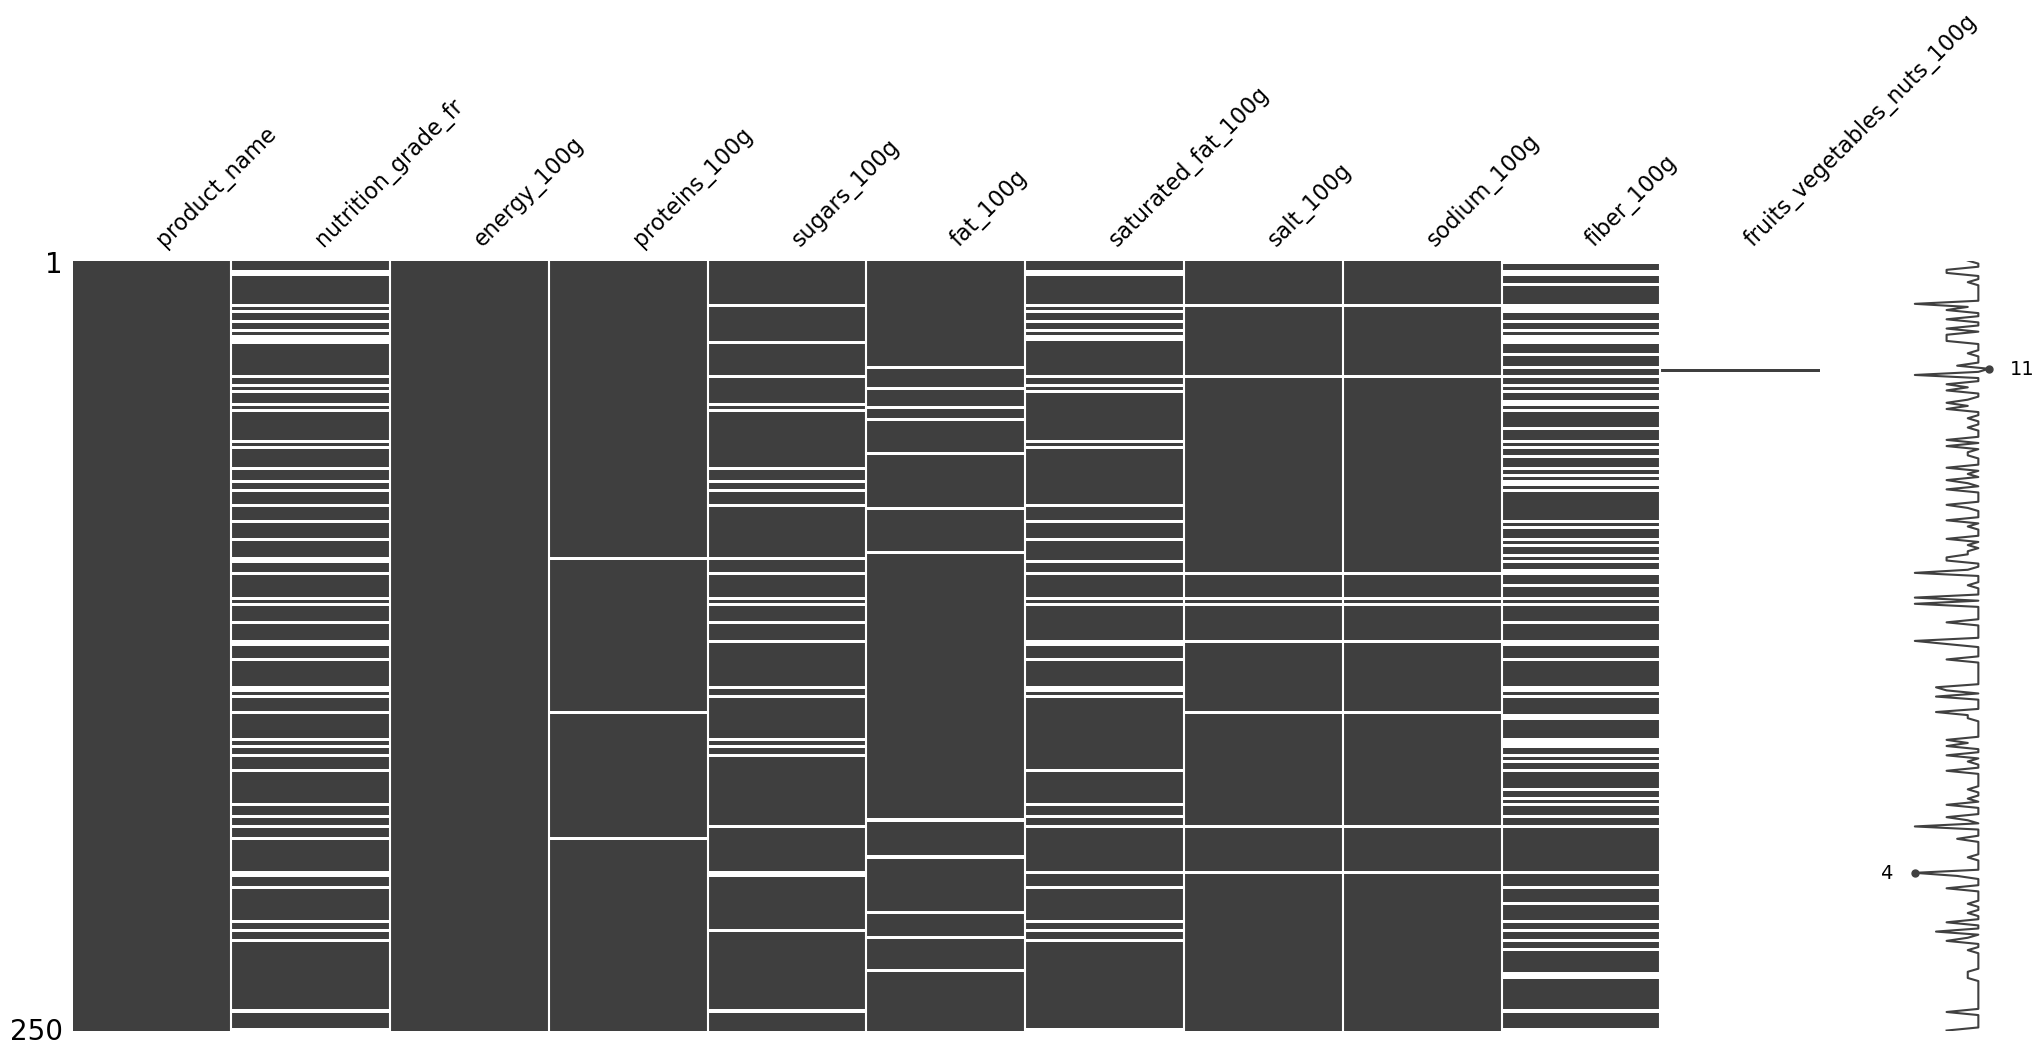

In [243]:
import missingno as msno
%matplotlib inline
msno.matrix(df.sample(250))

In [244]:
df_index_drop = []
for i in df.itertuples():
    if pd.isna(i.energy_100g)\
    | pd.isna(i.proteins_100g)\
    | pd.isna(i.sugars_100g)\
    | pd.isna(i.fat_100g)\
    | pd.isna(i.salt_100g)\
    | pd.isna(i.sodium_100g)\
    | pd.isna(i.fiber_100g)\
    | pd.isna(i.saturated_fat_100g)\
    | pd.isna(i.fruits_vegetables_nuts_100g)\
    | pd.isna(i.nutrition_grade_fr):
        df_index_drop.append(i.Index)
        
df_without_Nan = df.drop(df_index_drop).copy()

<Axes: >

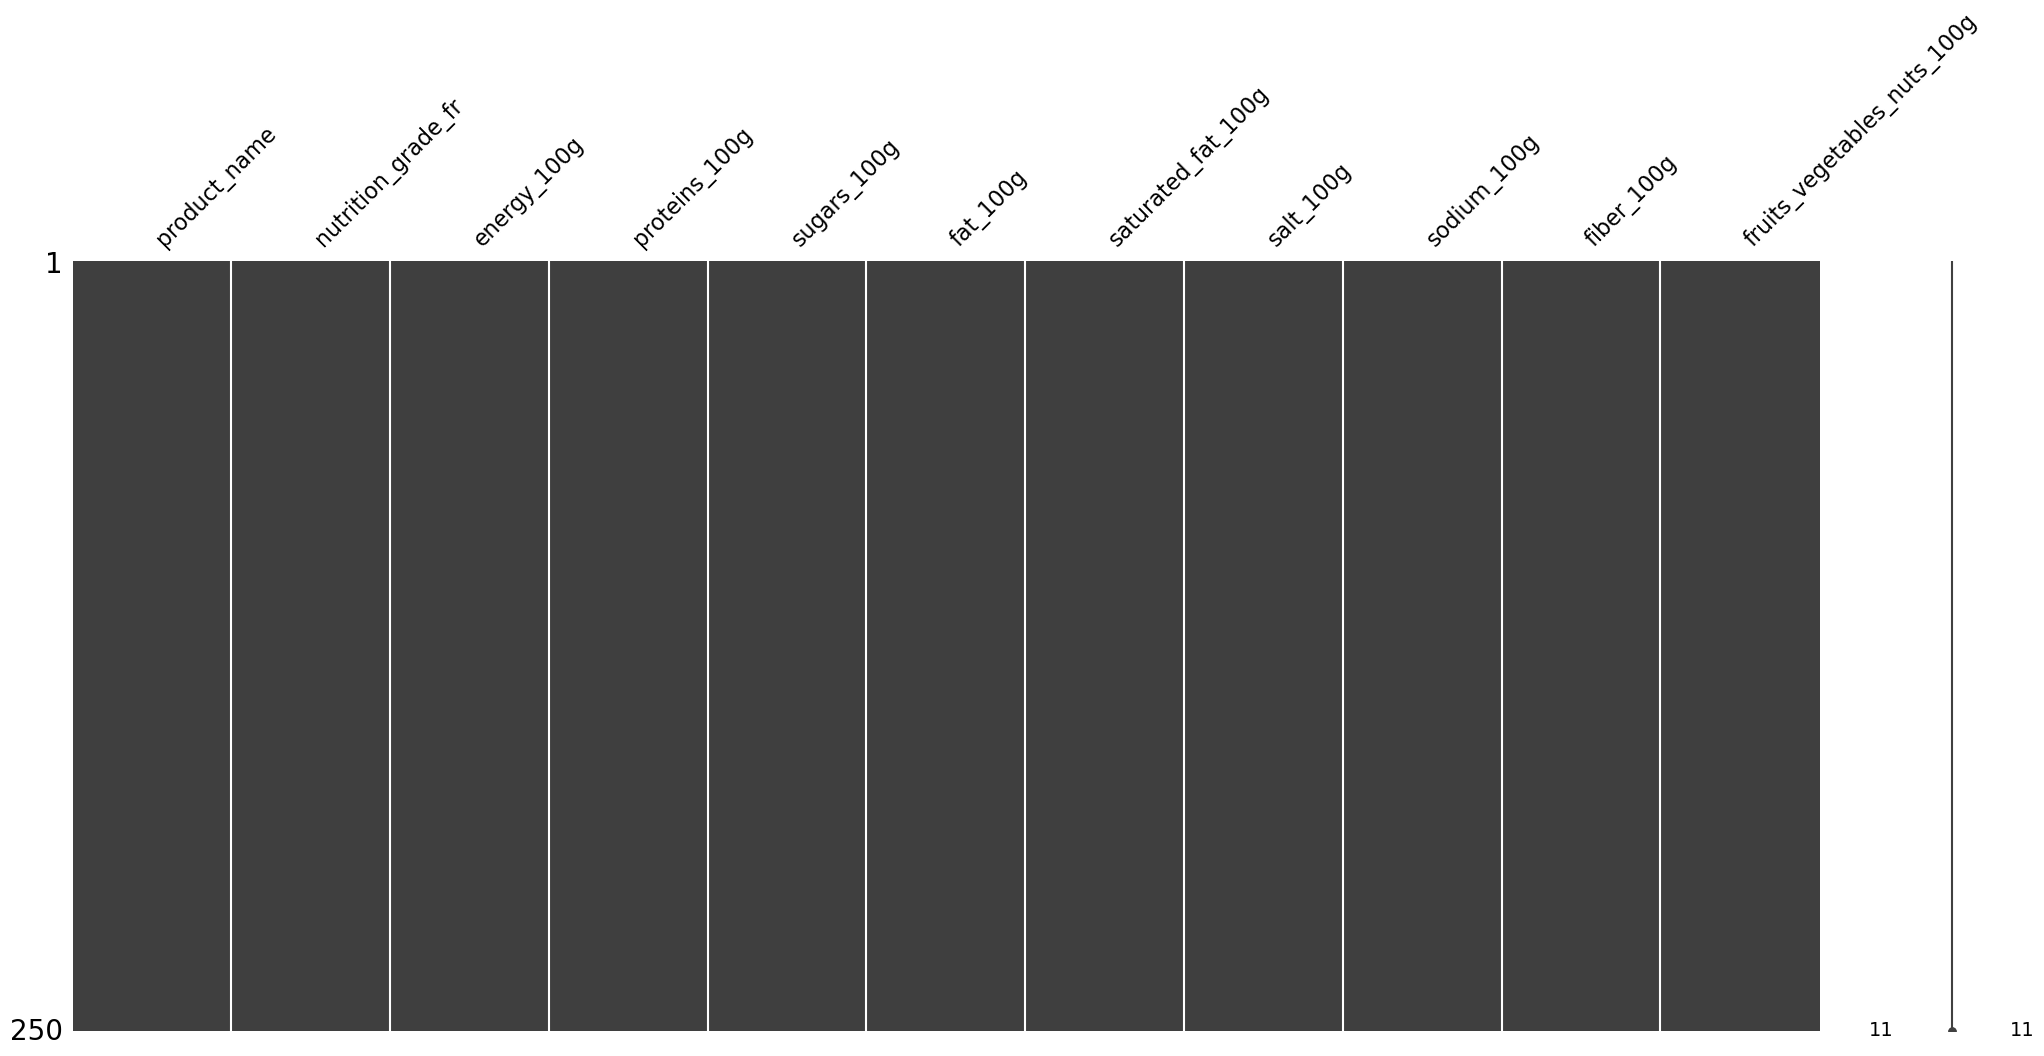

In [245]:
msno.matrix(df_without_Nan.sample(250))

In [246]:
import scipy.stats as st
import numpy as np

print(st.pearsonr(df_without_Nan["fat_100g"],df_without_Nan["saturated_fat_100g"])[0])
print(np.cov(df_without_Nan["fat_100g"],df_without_Nan["saturated_fat_100g"],ddof=0)[1,0])

0.7527124231665546
52.69713819247117


/var/folders/kl/3nc79ycx61v13jbqlw61nnfw0000gn/T/ipykernel_37301/2176917812.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_without_Nan.corr()


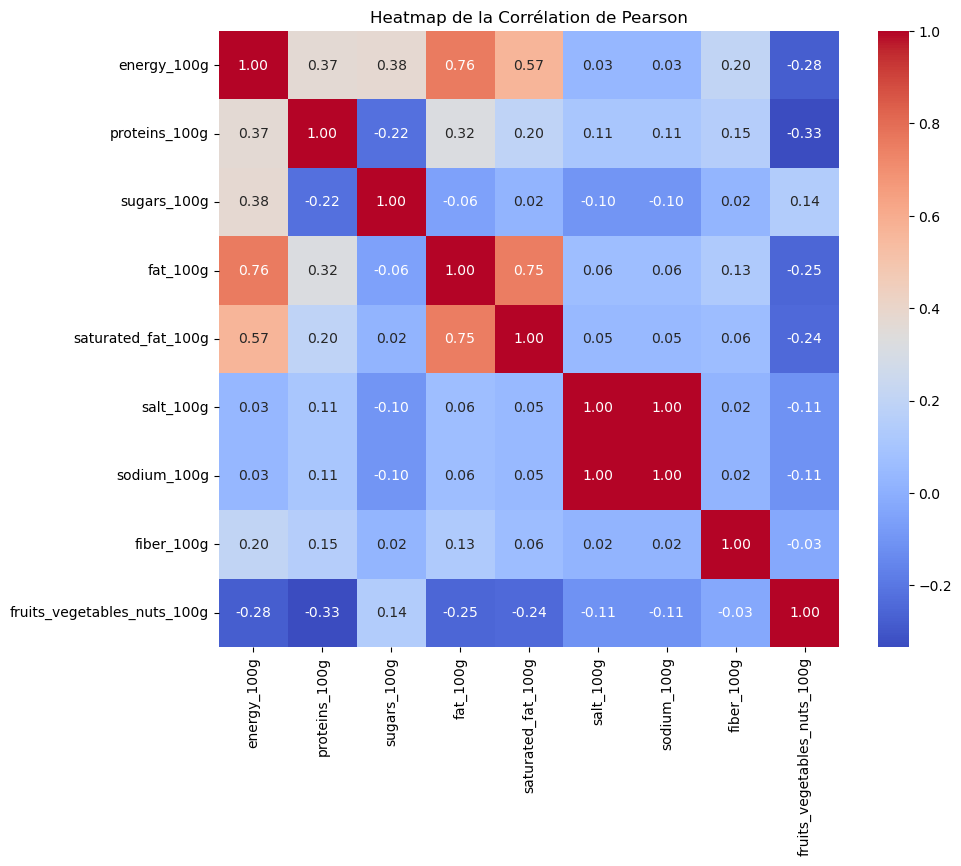

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df_without_Nan.corr()

plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de la Corrélation de Pearson')
plt.show()


In [248]:
#on constate une corrélation entre le salt et le sodium
#entre fat et satured fat
#egalement entre energy et fat a voir ??????

<Axes: >

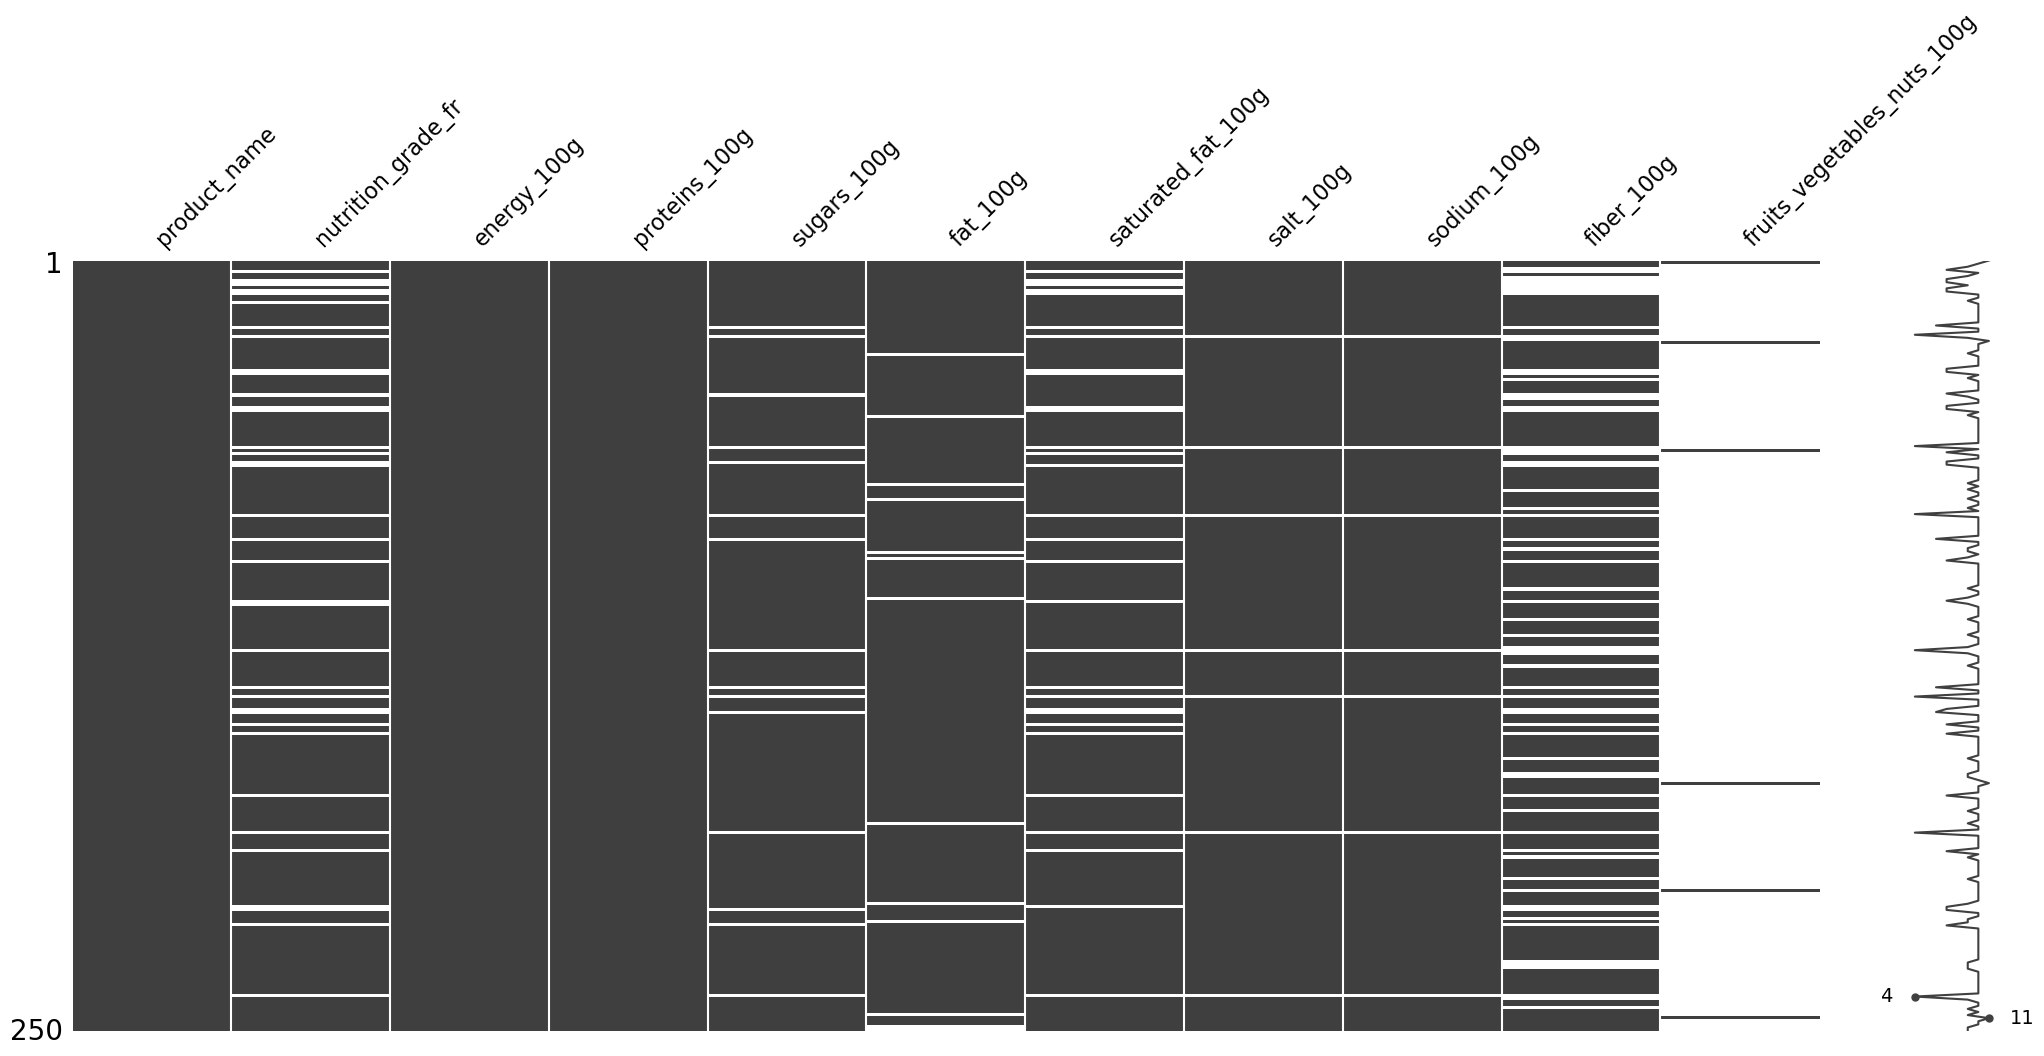

In [249]:
msno.matrix(df.sample(250))

<Axes: >

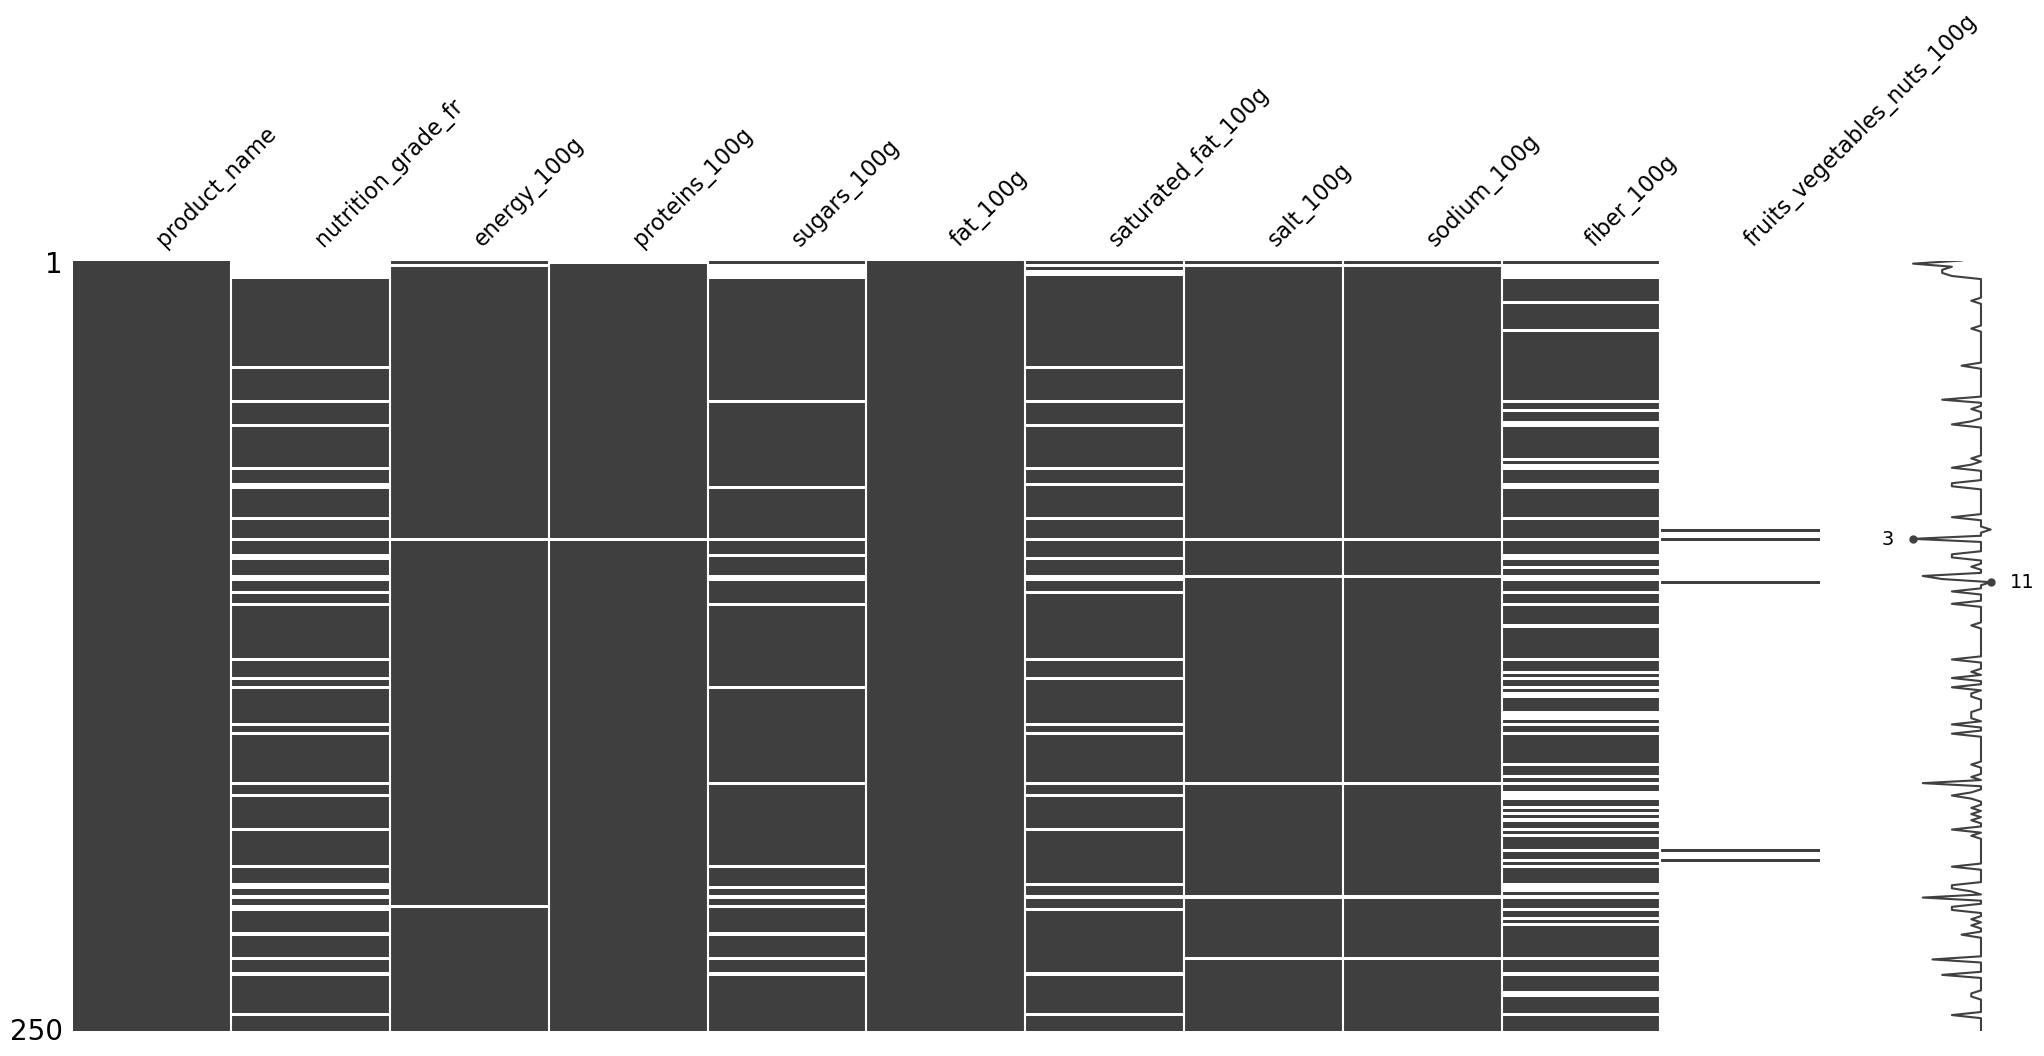

In [250]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
df['fat_100g'] = imputer.fit_transform(df[['fat_100g', 'saturated_fat_100g']])[:, 0]

msno.matrix(df.sample(250))

<Axes: >

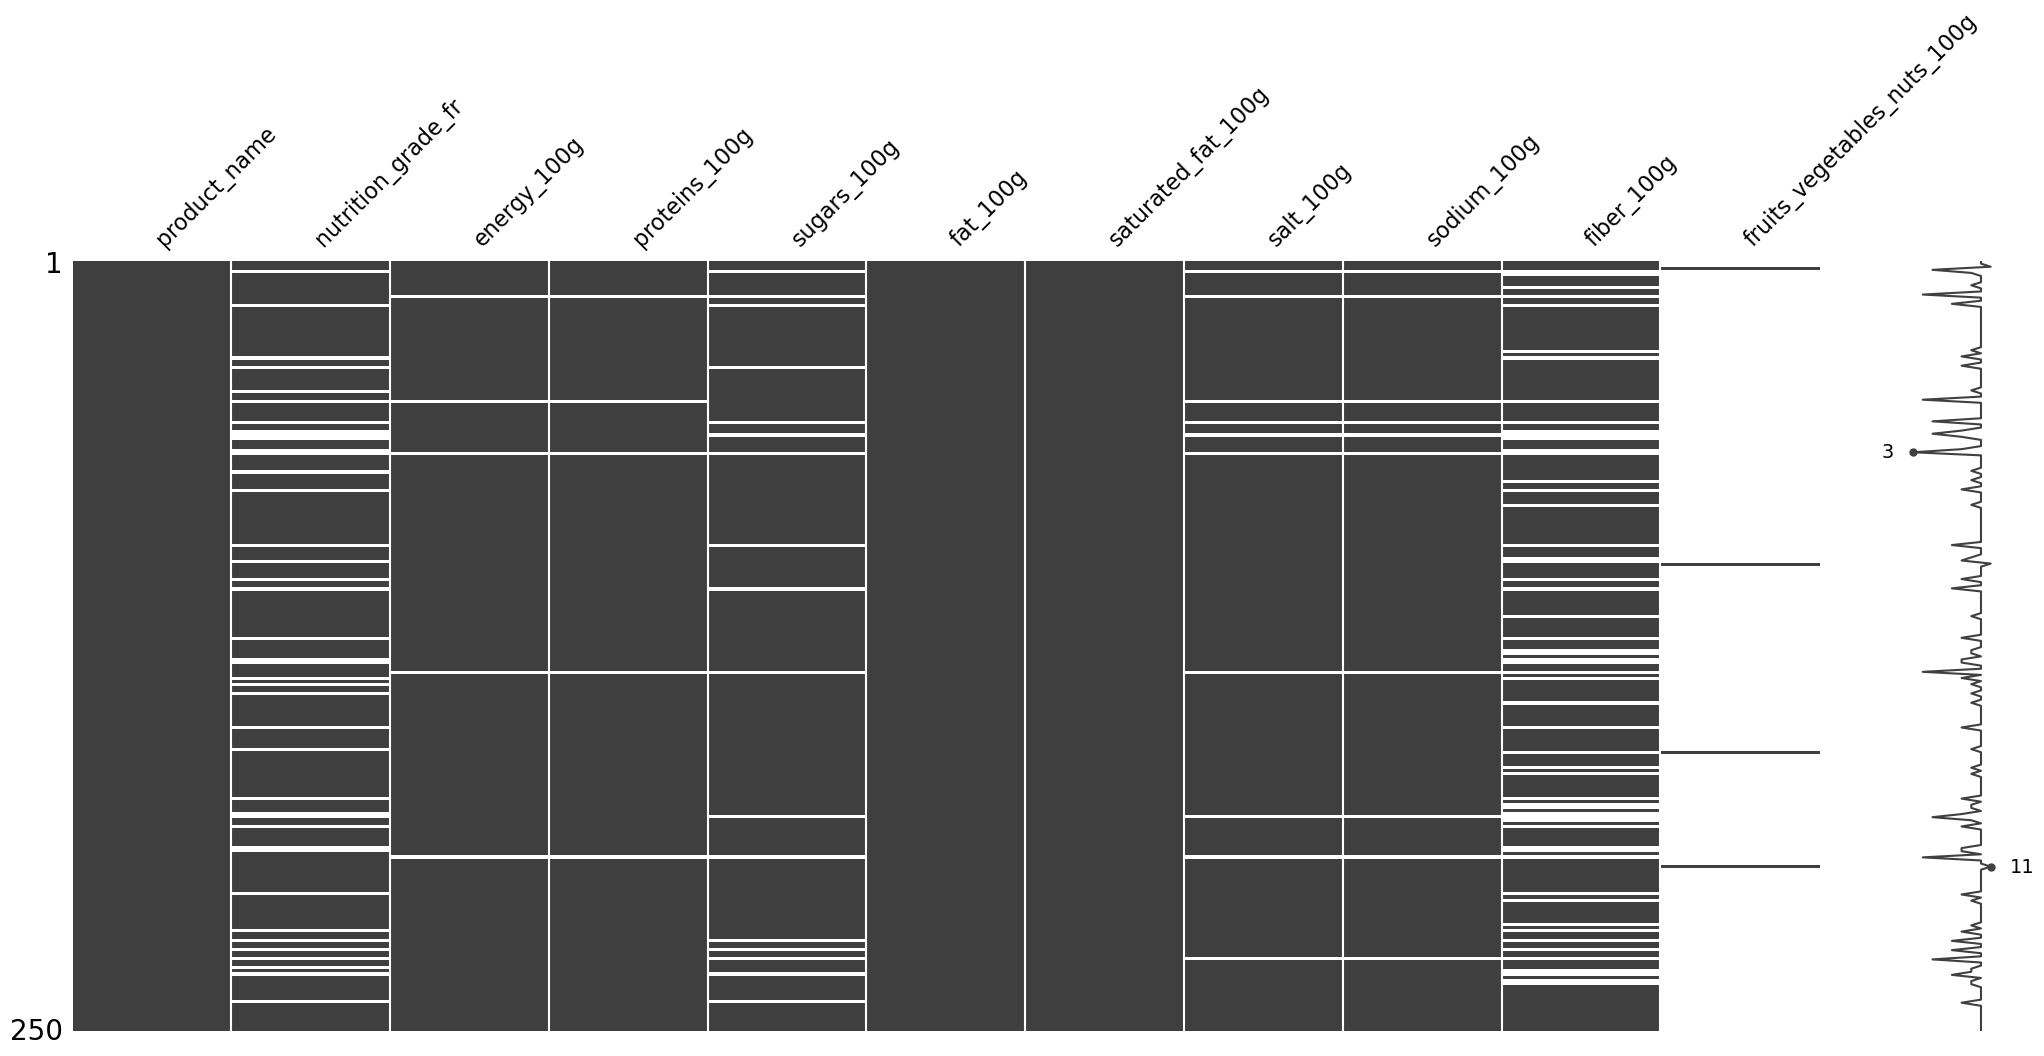

In [251]:
df['saturated_fat_100g'] = imputer.fit_transform(df[['saturated_fat_100g', 'fat_100g']])[:, 0]

msno.matrix(df.sample(250))

<Axes: >

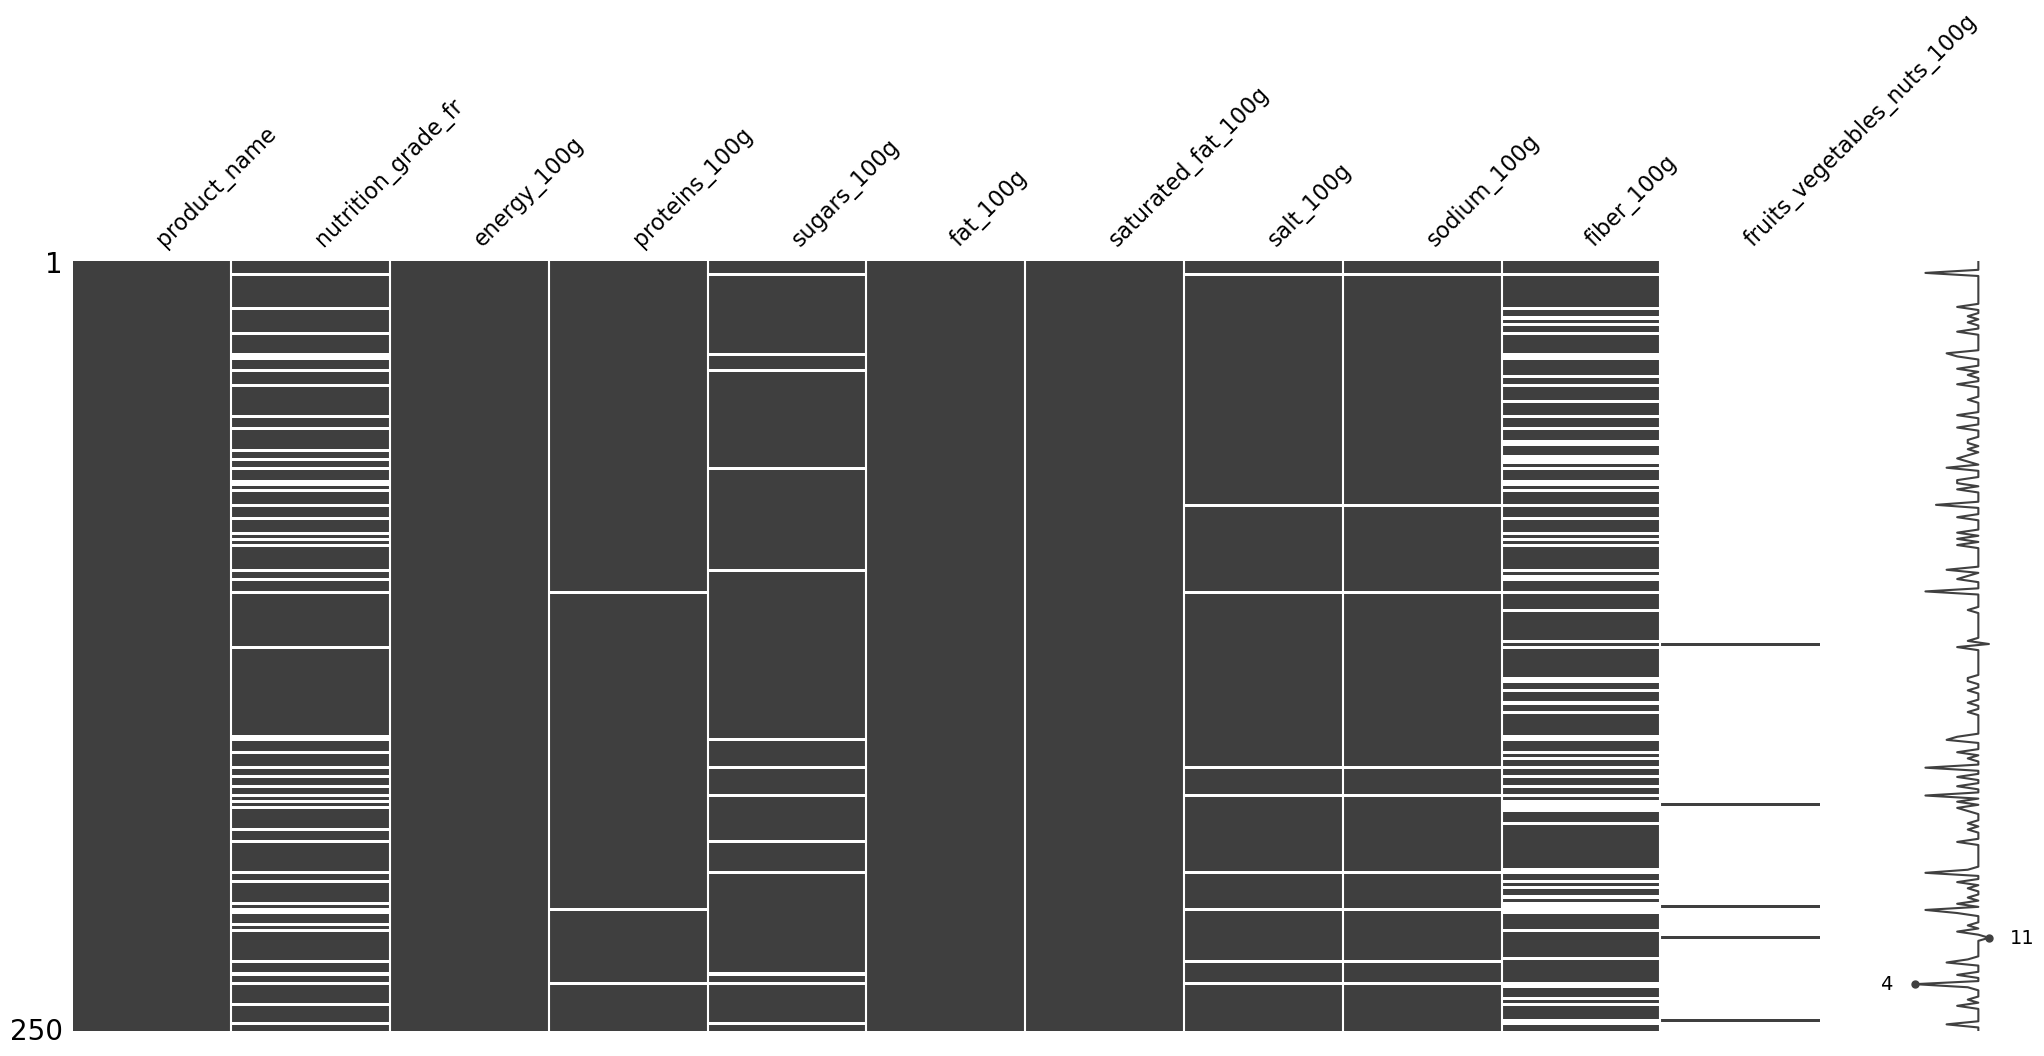

In [252]:
df['energy_100g'] = imputer.fit_transform(df[['energy_100g', 'fat_100g']])[:, 0]

msno.matrix(df.sample(250))

In [253]:
Nan_values = df.isnull().sum()
total_values = len(df)
Nan_values_percentage = (Nan_values / total_values) * 100
Nan_values_percentage = round(Nan_values_percentage, 2)
print(Nan_values_percentage)

product_name                    0.00
nutrition_grade_fr             15.81
energy_100g                     0.00
proteins_100g                   1.11
sugars_100g                     6.78
fat_100g                        0.00
saturated_fat_100g              0.00
salt_100g                       2.69
sodium_100g                     2.70
fiber_100g                     23.47
fruits_vegetables_nuts_100g    98.83
dtype: float64


In [254]:
#on supprime les données manquantes pour les paramètres
#proteins 1%
#sugars 6%
#salt = sodium 3%

In [255]:
index_null_value = df[df['proteins_100g'].isnull()].index
df.drop(index_null_value , inplace=True)
index_null_value = df[df['sugars_100g'].isnull()].index
df.drop(index_null_value , inplace=True)
index_null_value = df[df['salt_100g'].isnull()].index
df.drop(index_null_value , inplace=True)
index_null_value = df[df['sodium_100g'].isnull()].index
df.drop(index_null_value , inplace=True)
Nan_value = df.isnull().sum()
total_values = len(df)
Nan_values_percentage = (Nan_values / total_values) * 100
Nan_values_percentage = round(Nan_values_percentage, 2)
print(Nan_values_percentage)

product_name                     0.00
nutrition_grade_fr              17.12
energy_100g                      0.00
proteins_100g                    1.20
sugars_100g                      7.34
fat_100g                         0.00
saturated_fat_100g               0.00
salt_100g                        2.91
sodium_100g                      2.92
fiber_100g                      25.41
fruits_vegetables_nuts_100g    107.01
dtype: float64


<Axes: >

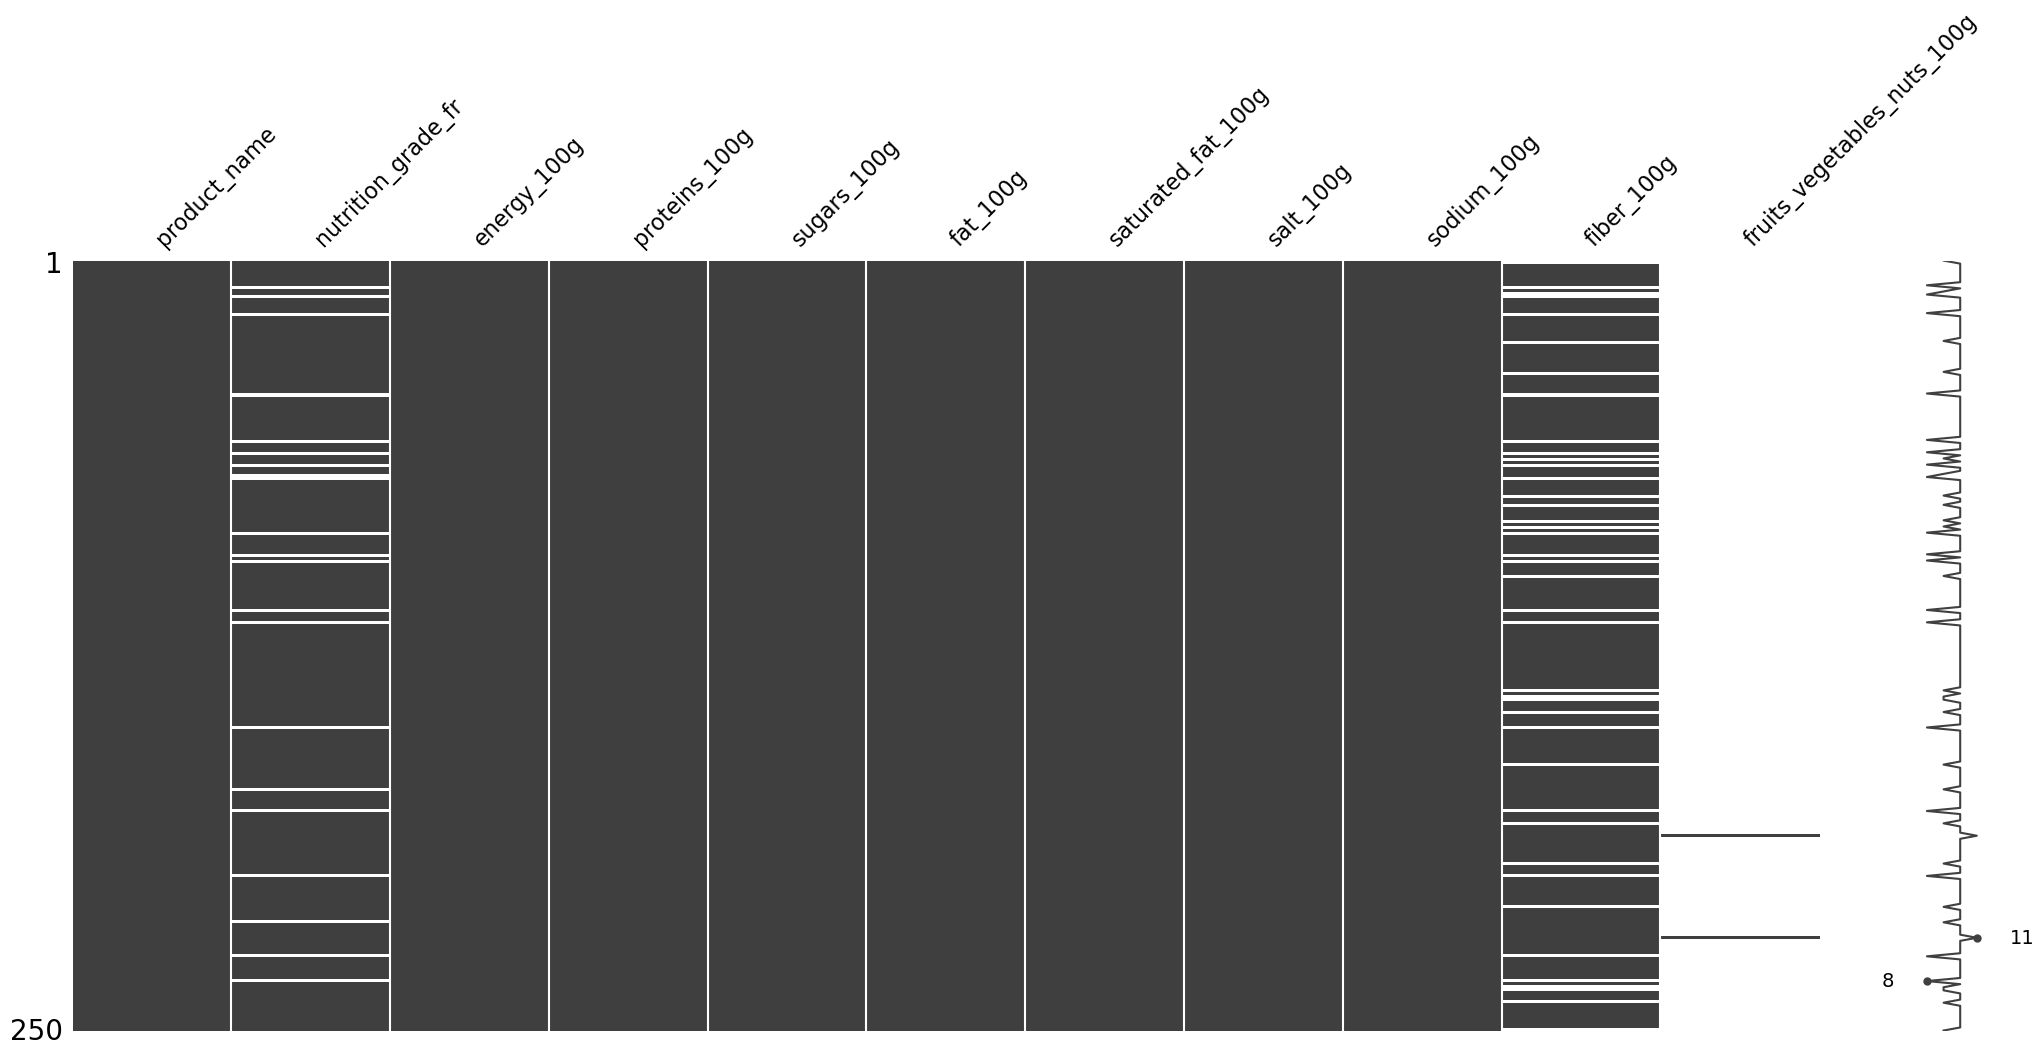

In [256]:
msno.matrix(df.sample(250))

In [257]:
df.shape

(239665, 11)

In [258]:
df[df['fruits_vegetables_nuts_100g'].notnull()]['fruits_vegetables_nuts_100g'].mean()

30.27746911401341

In [259]:
#remplacer les valeurs null par un zéro
df['fruits_vegetables_nuts_100g'] = df['fruits_vegetables_nuts_100g'].fillna(0)

<Axes: >

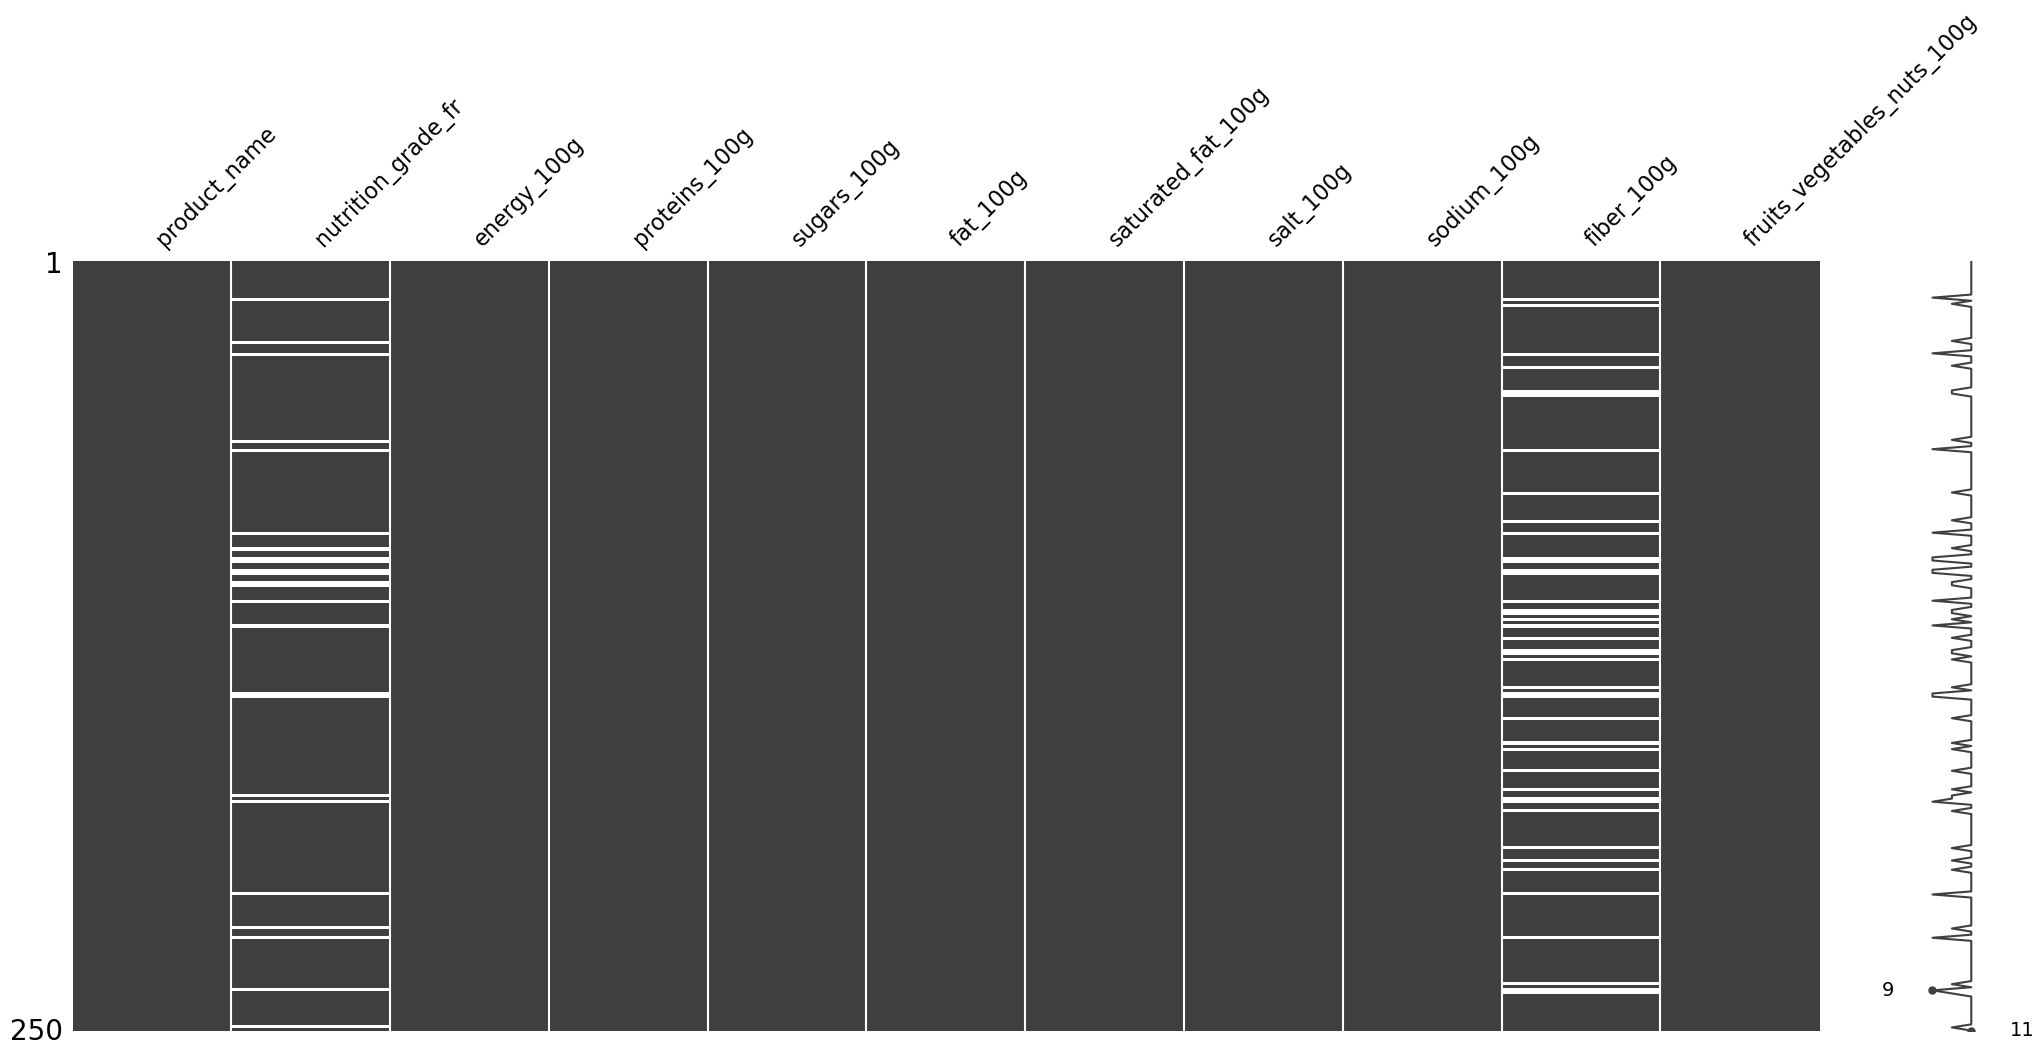

In [260]:
msno.matrix(df.sample(250))

<Axes: >

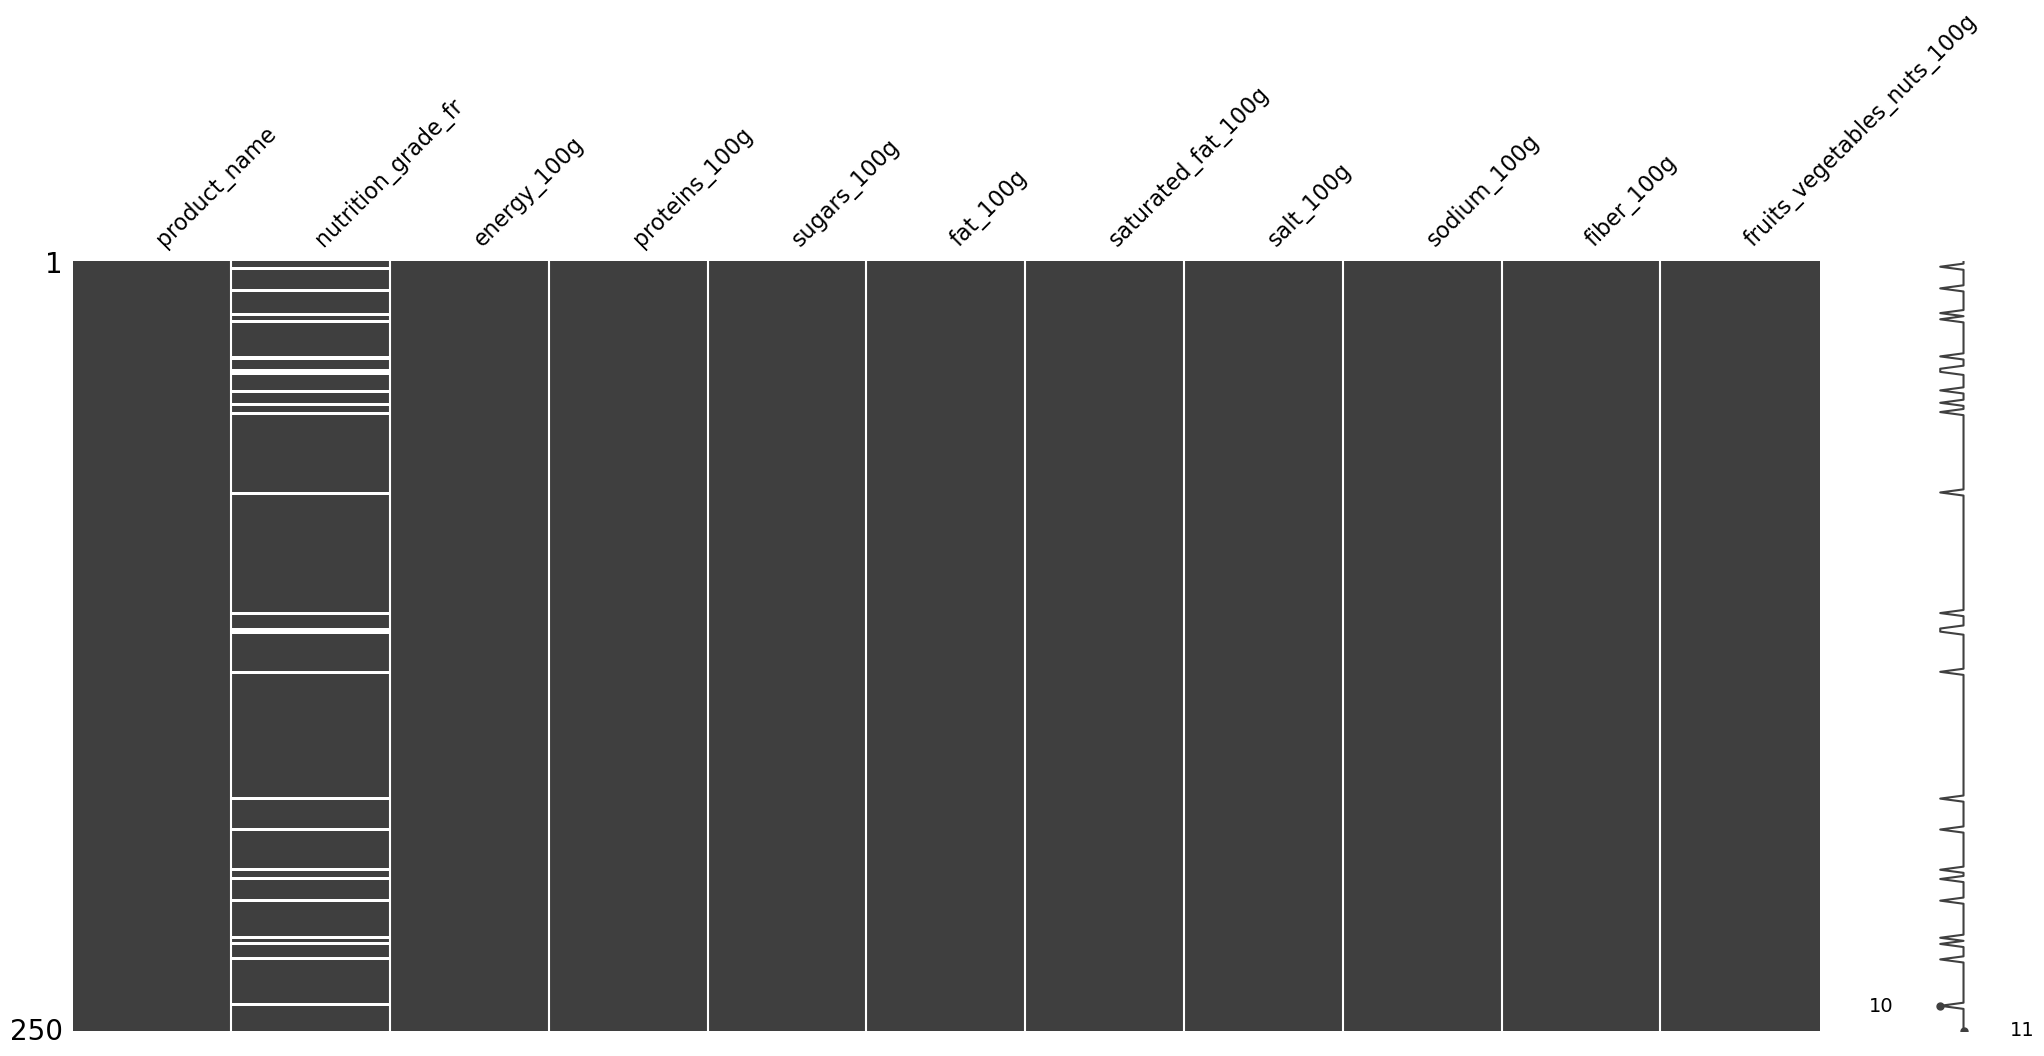

In [261]:
median_fiber = df[df['fiber_100g'].notnull()]['fiber_100g'].median()
df['fiber_100g'] = df['fiber_100g'].fillna(median_fiber)
msno.matrix(df.sample(250))

In [262]:
df.isnull().sum()

product_name                       0
nutrition_grade_fr             21388
energy_100g                        0
proteins_100g                      0
sugars_100g                        0
fat_100g                           0
saturated_fat_100g                 0
salt_100g                          0
sodium_100g                        0
fiber_100g                         0
fruits_vegetables_nuts_100g        0
dtype: int64

In [263]:
import pandas as pd
import numpy as np
from numpy import nan

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#tools for testing our model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [264]:
df_index_drop = []
for i in df.itertuples():
    if pd.isna(i.nutrition_grade_fr):
        df_index_drop.append(i.Index)
        
df_without_Nan = df.drop(df_index_drop).copy()

In [265]:
df_without_Nan.shape

(218277, 11)

In [266]:
df_sample = df_without_Nan.sample(50000, replace=False)

In [267]:
X = df_sample.iloc[:, 2:11]#toute la ligne de la 2eme à la 7eme colonne
y = df_sample.iloc[:, 1]#c'est la réponse et donc on veut la 2eme colonne
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
#on garde 20% pour le test plus tard

In [268]:
#mise à l'échelle des données
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

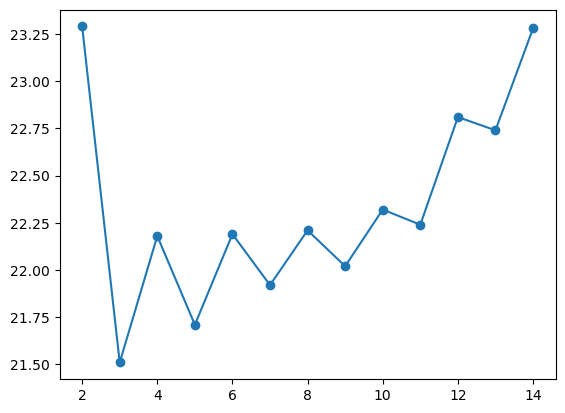

In [269]:
errors = []
for k in range(2,15):
    knn = KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(X_train, y_train).score(X_test, y_test)))
plt.plot(range(2,15), errors, 'o-')
plt.show()

In [270]:
X = df_without_Nan.iloc[:, 2:11]#toute la ligne de la 2eme à la 7eme colonne
y = df_without_Nan.iloc[:, 1]#c'est la réponse et donc on veut la 2eme colonne
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
#on garde 20% pour le test plus tard

In [271]:
#mise à l'échelle des données
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [272]:
#Define the model: Init K-NN
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='euclidean')

In [273]:
#fit model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [274]:
y_pred = classifier.predict(X_test)
y_pred

array(['d', 'd', 'c', ..., 'a', 'd', 'd'], dtype=object)

In [275]:
print(accuracy_score(y_test, y_pred))

0.797301630932747


In [276]:
#on doit refite notre modèle sur les valeurs qu'on veut retrouver

In [277]:
X = df_without_Nan.iloc[:, 2:11]#toute la ligne de la 2eme à la 7eme colonne
y = df_without_Nan.iloc[:, 1]#c'est la réponse et donc on veut la 2eme colonne

In [278]:
#mise à l'échelle des données
X_train = X
y_train = y
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)

In [279]:
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='euclidean')

In [280]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [281]:
X_test = df.iloc[:, 2:11]
valeurs_imputees = classifier.predict(X_test)

/Applications/anaconda3/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [282]:
valeurs_imputees.shape

(239665,)

In [283]:
df.shape

(239665, 11)

In [284]:
valeurs_imputees

array(['e', 'e', 'e', ..., 'e', 'd', 'e'], dtype=object)

In [285]:
valeurs_imputation_series = pd.Series(valeurs_imputees, index=df.index)
df['nutrition_grade_fr'].fillna(valeurs_imputation_series, inplace=True)

In [286]:
df.isnull().sum()

product_name                   0
nutrition_grade_fr             0
energy_100g                    0
proteins_100g                  0
sugars_100g                    0
fat_100g                       0
saturated_fat_100g             0
salt_100g                      0
sodium_100g                    0
fiber_100g                     0
fruits_vegetables_nuts_100g    0
dtype: int64

<Axes: >

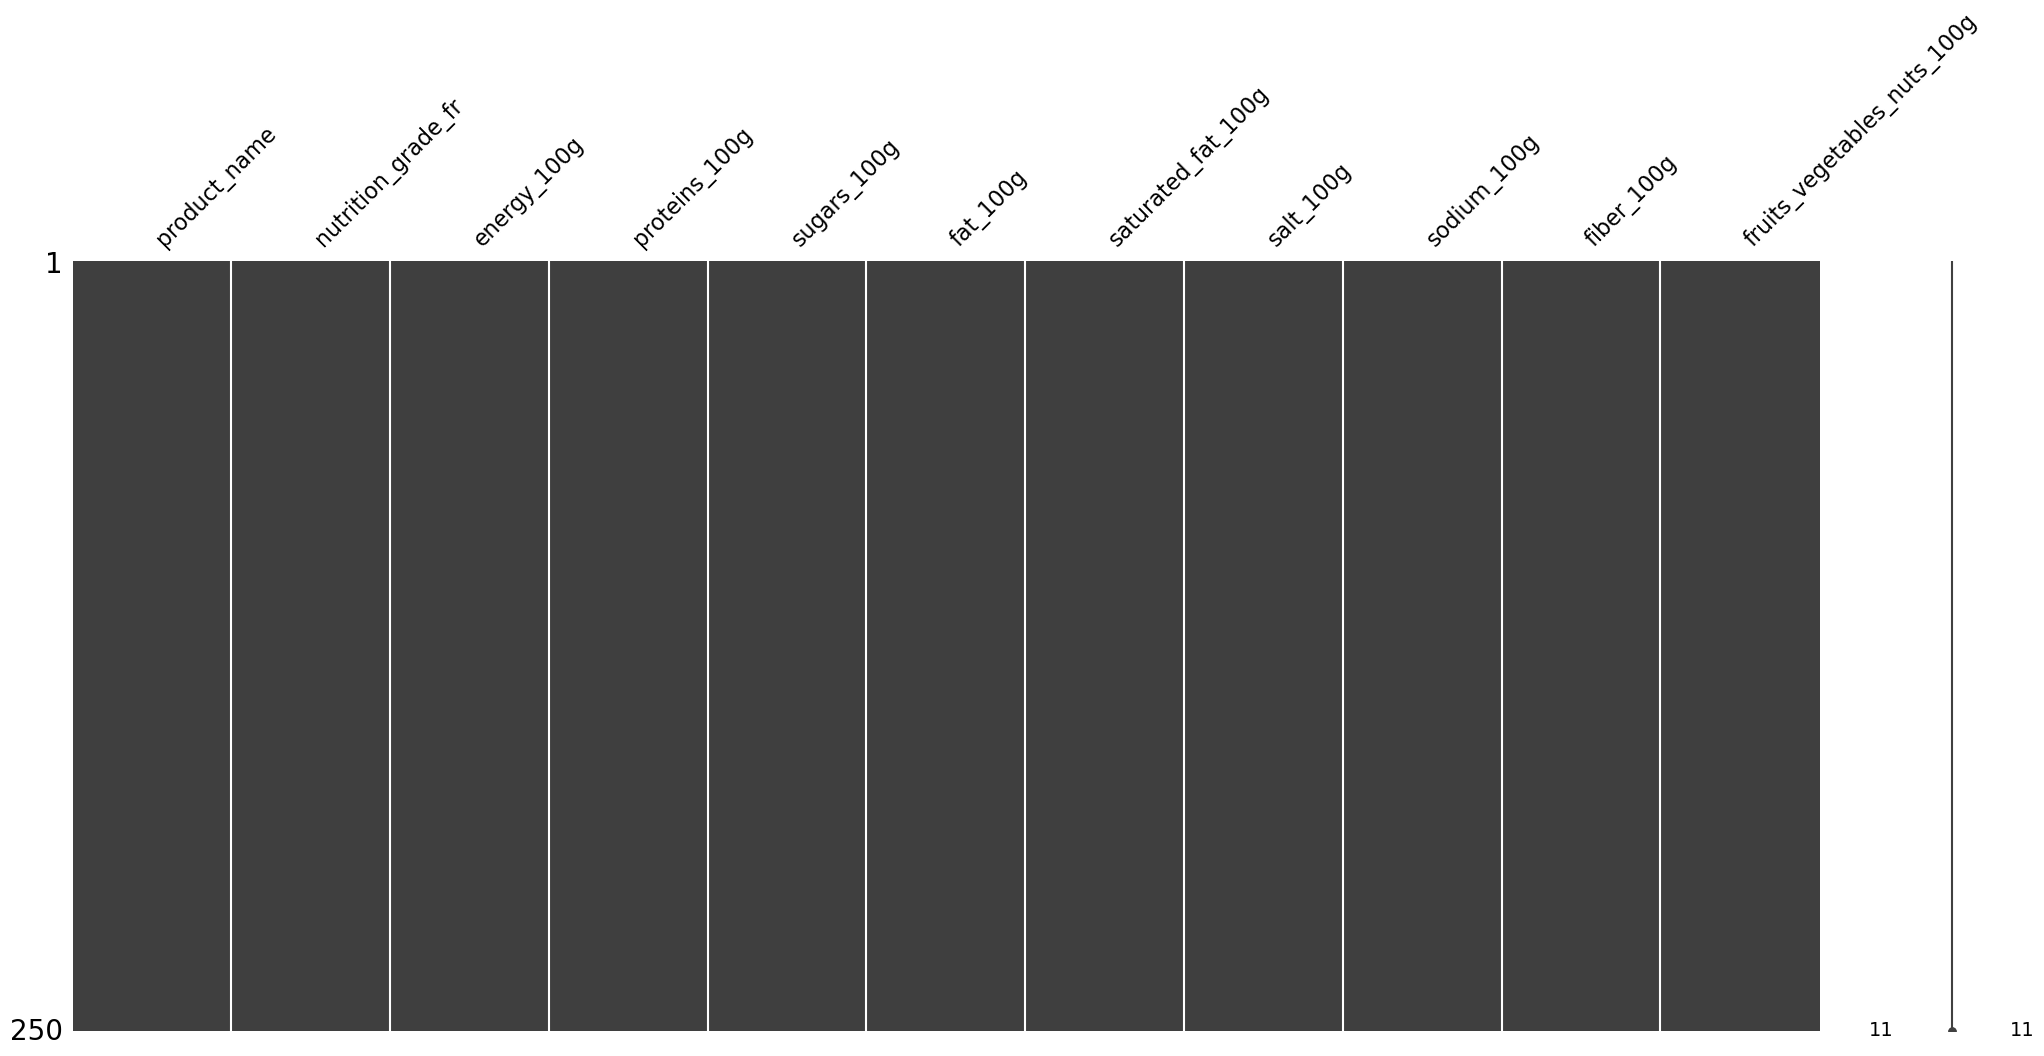

In [287]:
msno.matrix(df.sample(250))

In [288]:
#on supprime les valeurs aberrantes

In [289]:
index_drop_rogue_value = df[df['proteins_100g'] > 100].index
df.drop(index_drop_rogue_value, inplace=True)

In [290]:
index_drop_rogue_value = df[df['sugars_100g'] > 100].index
df.drop(index_drop_rogue_value, inplace=True)

In [291]:
index_drop_rogue_value = df[df['fat_100g'] > 100].index
df.drop(index_drop_rogue_value, inplace=True)

In [292]:
index_drop_rogue_value = df[df['saturated_fat_100g'] > 100].index
df.drop(index_drop_rogue_value, inplace=True)

In [293]:
index_drop_rogue_value = df[df['salt_100g'] > 100].index
df.drop(index_drop_rogue_value, inplace=True)

In [294]:
index_drop_rogue_value = df[df['fiber_100g'] > 100].index
df.drop(index_drop_rogue_value, inplace=True)

In [295]:
index_drop_rogue_value = df[df['proteins_100g'] < 0].index
df.drop(index_drop_rogue_value, inplace=True)

In [296]:
index_drop_rogue_value = df[df['sugars_100g'] < 0].index
df.drop(index_drop_rogue_value, inplace=True)

In [297]:
index_drop_rogue_value = df[df['fiber_100g'] < 0].index
df.drop(index_drop_rogue_value, inplace=True)

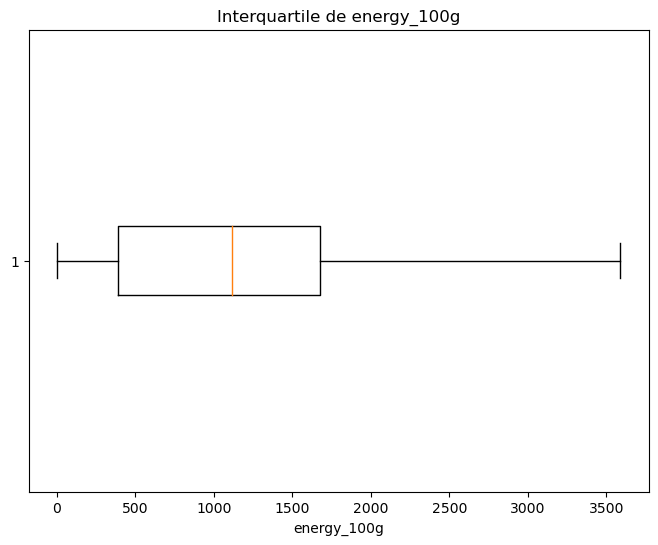

In [298]:
import matplotlib.pyplot as plt
df_energy = pd.DataFrame(df['energy_100g'])
df_temporary = df_energy.dropna().copy()

plt.figure(figsize=(8, 6))
plt.boxplot(df_temporary.values, vert=False, showfliers=False)
plt.xlabel('energy_100g')
plt.title('Interquartile de energy_100g')

plt.show()

In [299]:
#aliment ayant le plus de kilojoules huile d'avocat 3765kj
#on supprime les aliments supérieurs à 3765
index_drop_value = df[df['energy_100g'] > 3765].index
df.drop(index_drop_value, inplace=True)

In [301]:
df.head(50)

,product_name,nutrition_grade_fr,energy_100g,proteins_100g,sugars_100g,fat_100g,saturated_fat_100g,salt_100g,sodium_100g,fiber_100g,fruits_vegetables_nuts_100g
1,Banana Chips Sweetened (Whole),d,2243.0,3.57,14.29,28.57000,28.570000,0.00000,0.000,3.6,0.0
2,Peanuts,b,1941.0,17.86,17.86,17.86000,0.000000,0.63500,0.250,7.1,0.0
3,Organic Salted Nut Mix,d,2540.0,17.86,3.57,57.14000,5.360000,1.22428,0.482,7.1,0.0
7,Organic Muesli,c,1833.0,14.06,15.62,18.75000,4.690000,0.13970,0.055,9.4,0.0
12,Zen Party Mix,d,2230.0,16.67,3.33,36.67000,5.000000,1.60782,0.633,6.7,0.0
15,Cinnamon Nut Granola,b,1824.0,14.55,21.82,18.18000,1.820000,0.02286,0.009,9.1,0.0
16,Organic Hazelnuts,b,2632.0,14.29,3.57,60.71000,3.570000,0.01016,0.004,10.7,0.0
19,Organic Oat Groats,a,1096.0,16.67,2.38,5.95000,1.190000,0.02540,0.010,9.5,0.0
20,Energy Power Mix,d,1464.0,7.50,32.50,17.50000,7.500000,0.28448,0.112,5.0,0.0
21,Antioxidant Mix - Berries & Chocolate,d,2092.0,13.33,30.00,33.33000,6.670000,0.46482,0.183,6.7,0.0
